In [1]:
import pandas as pd
from scipy.stats import t
from scipy import stats

import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 7]
from matplotlib import pyplot as plt

In [2]:
payments_CG1 = pd.read_excel(r'C:\Users\Андрей Клычев\Desktop\Младший аналитик\Data\payments_CG1.xlsx')
payments_CG2 = pd.read_excel(r'C:\Users\Андрей Клычев\Desktop\Младший аналитик\Data\payments_CG2.xlsx')
payments_TG = pd.read_excel(r'C:\Users\Андрей Клычев\Desktop\Младший аналитик\Data\payments_TG.xlsx')
portrait_CG1 = pd.read_excel(r'C:\Users\Андрей Клычев\Desktop\Младший аналитик\Data\portrait_CG1.xlsx')
portrait_CG2 = pd.read_excel(r'C:\Users\Андрей Клычев\Desktop\Младший аналитик\Data\portrait_CG2.xlsx')
portrait_TG = pd.read_excel(r'C:\Users\Андрей Клычев\Desktop\Младший аналитик\Data\portrait_TG.xlsx')

#### Для начала проведем замену отсутствующих значений на нули

In [336]:
portrait_CG1.coins = portrait_CG1.coins.fillna(0)
portrait_CG2.coins = portrait_CG2.coins.fillna(0)
portrait_TG.coins = portrait_TG.coins.fillna(0)

In [337]:
portrait_CG1.retention_days = portrait_CG1.retention_days.fillna(0)
portrait_CG2.retention_days = portrait_CG2.retention_days.fillna(0)
portrait_TG.retention_days = portrait_TG.retention_days.fillna(0)

In [338]:
portrait_CG1.was_special = portrait_CG1.was_special.fillna(0)
portrait_CG2.was_special = portrait_CG2.was_special.fillna(0)
portrait_TG.was_special = portrait_TG.was_special.fillna(0)

portrait_CG1.is_special = portrait_CG1.is_special.fillna(0)
portrait_CG2.is_special = portrait_CG2.is_special.fillna(0)
portrait_TG.is_special = portrait_TG.is_special.fillna(0)


In [344]:
# Отфильтруем выбросы, хоть возраст можно выбрать любой, и выбор возраста в 100 лет, это скорее следствие
# поспешного нажатитя кнопки при регистрации, тем не менее это может помешать при кластеризации пользователей

portrait_CG1 = portrait_CG1.loc[(portrait_CG1.coins <3500) & (portrait_CG1.age < 80)].reset_index(drop=True)
portrait_CG2 = portrait_CG2.loc[(portrait_CG2.coins <3500) & (portrait_CG2.age < 80)].reset_index(drop=True)
portrait_TG = portrait_TG.loc[(portrait_TG.coins <3500) & (portrait_TG.age < 80)].reset_index(drop=True)

In [345]:
# По срокам платежей 2 контрольная группа больше схжа с тестовой
print(payments_CG1.payment_date.min(), payments_CG1.payment_date.max())
print(payments_CG2.payment_date.min(), payments_CG2.payment_date.max())
print(payments_TG.payment_date.min(), payments_TG.payment_date.max())

2016-12-14 16:16:00 2017-11-15 09:28:00
2017-10-14 02:57:00 2017-11-15 02:15:00
2017-10-14 04:23:00 2017-11-15 09:31:00


##### Сперва проверим выборки на принадлежность к единой генеральной совокупности

In [324]:
import researchpy as rp
descriptives, results = rp.ttest(portrait_CG1.age, portrait_CG2.age)
print(descriptives)
print()
print(results)

   Variable       N       Mean        SD        SE  95% Conf.   Interval
0       age  4329.0  31.961192  9.818118  0.149223  31.668639  32.253745
1       age  4259.0  31.974172  9.955504  0.152549  31.675097  32.273248
2  combined  8588.0  31.967629  9.885916  0.106677  31.758517  32.176742

          Independent t-test    results
0  Difference (age - age) =     -0.0130
1      Degrees of freedom =   8586.0000
2                       t =     -0.0608
3   Two side test p value =      0.9515
4  Difference < 0 p value =      0.4757
5  Difference > 0 p value =      0.5243
6               Cohen's d =     -0.0013
7               Hedge's g =     -0.0013
8           Glass's delta =     -0.0013
9                       r =      0.0007


In [4]:
descriptives, results = rp.ttest(portrait_CG1.sex, portrait_TG.sex)
print(descriptives)
print()
print(results)

   Variable       N      Mean        SD        SE  95% Conf.  Interval
0       sex  4340.0  0.958065  0.200465  0.003043   0.952099  0.964030
1       sex  4308.0  0.953110  0.211427  0.003221   0.946795  0.959426
2  combined  8648.0  0.955597  0.206001  0.002215   0.951254  0.959939

          Independent t-test    results
0  Difference (sex - sex) =      0.0050
1      Degrees of freedom =   8646.0000
2                       t =      1.1182
3   Two side test p value =      0.2635
4  Difference < 0 p value =      0.8682
5  Difference > 0 p value =      0.1318
6               Cohen's d =      0.0240
7               Hedge's g =      0.0240
8           Glass's delta =      0.0247
9                       r =      0.0120


In [334]:
descriptives, results = rp.ttest(portrait_CG2.is_special, portrait_CG1.is_special)
print(descriptives)
print()
print(results)

     Variable       N      Mean        SD        SE  95% Conf.  Interval
0  is_special  4259.0  0.044611  0.206473  0.003164   0.038409  0.050814
1  is_special  4329.0  0.043659  0.204359  0.003106   0.037570  0.049748
2    combined  8588.0  0.044131  0.205399  0.002216   0.039787  0.048476

                        Independent t-test    results
0  Difference (is_special - is_special) =      0.0010
1                    Degrees of freedom =   8586.0000
2                                     t =      0.2148
3                 Two side test p value =      0.8299
4                Difference < 0 p value =      0.5850
5                Difference > 0 p value =      0.4150
6                             Cohen's d =      0.0046
7                             Hedge's g =      0.0046
8                         Glass's delta =      0.0046
9                                     r =      0.0023


##### Значения t-критерия не превышают значения 1,96 (значение для дов. интервала 95% при df>120) по основным метрикам
##### На основе этого полагаем, что портреты пользователей в контроьных группах в среднем похожи

In [356]:
descriptives, results = rp.ttest(portrait_TG.view_count, portrait_CG2.view_count)
print(descriptives)
print()
print(results)

     Variable       N       Mean          SD        SE  95% Conf.   Interval
0  view_count  4298.0  47.424383  252.501984  3.851515  39.873426  54.975341
1  view_count  4259.0  45.051186  318.365897  4.878347  35.487082  54.615289
2    combined  8557.0  46.243193  287.163915  3.104339  40.157940  52.328446

                        Independent t-test    results
0  Difference (view_count - view_count) =      2.3732
1                    Degrees of freedom =   8555.0000
2                                     t =      0.3822
3                 Two side test p value =      0.7023
4                Difference < 0 p value =      0.6488
5                Difference > 0 p value =      0.3512
6                             Cohen's d =      0.0083
7                             Hedge's g =      0.0083
8                         Glass's delta =      0.0094
9                                     r =      0.0041


In [357]:
descriptives, results = rp.ttest(portrait_CG2.sex, portrait_TG.sex)
print(descriptives)
print()
print(results)

   Variable       N      Mean        SD        SE  95% Conf.  Interval
0       sex  4259.0  0.954449  0.208533  0.003195   0.948185  0.960714
1       sex  4298.0  0.953234  0.211162  0.003221   0.946919  0.959549
2  combined  8557.0  0.953839  0.209846  0.002269   0.949392  0.958286

          Independent t-test    results
0  Difference (sex - sex) =      0.0012
1      Degrees of freedom =   8555.0000
2                       t =      0.2679
3   Two side test p value =      0.7888
4  Difference < 0 p value =      0.6056
5  Difference > 0 p value =      0.3944
6               Cohen's d =      0.0058
7               Hedge's g =      0.0058
8           Glass's delta =      0.0058
9                       r =      0.0029


In [358]:
descriptives, results = rp.ttest(portrait_CG2.is_special, portrait_TG.is_special)
print(descriptives)
print()
print(results)

     Variable       N      Mean        SD        SE  95% Conf.  Interval
0  is_special  4259.0  0.044611  0.206473  0.003164   0.038409  0.050814
1  is_special  4298.0  0.036063  0.186469  0.002844   0.030487  0.041640
2    combined  8557.0  0.040318  0.196715  0.002127   0.036149  0.044486

                        Independent t-test    results
0  Difference (is_special - is_special) =      0.0085
1                    Degrees of freedom =   8555.0000
2                                     t =      2.0102
3                 Two side test p value =      0.0444
4                Difference < 0 p value =      0.9778
5                Difference > 0 p value =      0.0222
6                             Cohen's d =      0.0435
7                             Hedge's g =      0.0435
8                         Glass's delta =      0.0414
9                                     r =      0.0217


##### Ключевой показатель - наличие платной подписки, т-критерий Стьюденты превышает значение в 1,96
##### Ко всему прочему заметно ниже среднее количество платных подписок в тестовой группе
##### Предполагаем, что между выборками есть различия

In [23]:
def ff(row1, row2):
    count_was = 0
    count_stay = 0
    count_left = 0
    count_become = 0
    try:
        for el in range(len(row1)):
            if row1[el] == row2[el] == 0:
                count_was += 1

            elif row1[el] == row2[el] == 1:
                count_stay += 1

            elif row1[el] == 1 and row2[el] == 0:     
                count_left += 1

            elif row1[el] == 0 and row2[el] == 1:
                count_become += 1
    except:
        raise
    return (count_was, count_become, count_left, count_stay)

TG = ff(portrait_TG.was_special, portrait_TG.is_special)
C1 = ff(portrait_CG1.was_special, portrait_CG1.is_special)
C2 = ff(portrait_CG2.was_special, portrait_CG2.is_special)

In [40]:
print(f'Кол-во человек в тестовой группе, до и и после не имевших премиум-аккаунт: {TG[0]}, {TG[0]/sum(TG):.2f}%')
print(f'Кол-во человек в тестовой группе, до и после сохранивших премиум-аккаунт: {TG[1]}, {TG[1]/sum(TG):.2f}%')
print(f'Кол-во человек в тестовой группе, отказавшихся от премиум-аккаунта: {TG[2]}, {TG[2]/sum(TG):.2f}%')
print(f'Кол-во человек в тестовой группе, приобретших премиум-аккаунт: {TG[3]}, {TG[3]/sum(TG):.2f}%')
print(f'Всего: {sum(TG)}')
print()
print(f'Кол-во человек в контрольной группе № 1, до и и после не имевших премиум-аккаунт: {C1[0]}, {C1[0]/sum(C1):.2f}%')
print(f'Кол-во человек в контрольной группе № 1, до и после сохранивших премиум-аккаунт: {C1[1]}, {C1[1]/sum(C1):.2f}%')
print(f'Кол-во человек в контрольной группе № 1, отказавшихся от премиум-аккаунта: {C1[2]}, {C1[2]/sum(C1):.2f}%')
print(f'Кол-во человек в контрольной группе № 1, приобретших премиум-аккаунт: {C1[3]}, {C1[3]/sum(C1):.2f}%')
print(f'Всего: {sum(C1)}')
print()
print(f'Кол-во человек в контрольной группе № 2, до и и после не имевших премиум-аккаунт: {C2[0]}, {C2[0]/sum(C2):.2f}%')
print(f'Кол-во человек в контрольной группе № 2, до и после сохранивших премиум-аккаунт: {C2[1]}, {C2[1]/sum(C2):.2f}%')
print(f'Кол-во человек в контрольной группе № 2, отказавшихся от премиум-аккаунта: {C2[2]}, {C2[2]/sum(C2):.2f}%')
print(f'Кол-во человек в контрольной группе № 2, приобретших премиум-аккаунт: {C2[3]}, {C2[3]/sum(C2):.2f}%')
print(f'Всего: {sum(C2)}')

Кол-во человек в тестовой группе, до и и после не имевших премиум-аккаунт: 3892, 0.91%
Кол-во человек в тестовой группе, до и после сохранивших премиум-аккаунт: 0, 0.00%
Кол-во человек в тестовой группе, отказавшихся от премиум-аккаунта: 251, 0.06%
Кол-во человек в тестовой группе, приобретших премиум-аккаунт: 155, 0.04%
Всего: 4298

Кол-во человек в контрольной группе № 1, до и и после не имевших премиум-аккаунт: 3896, 0.90%
Кол-во человек в контрольной группе № 1, до и после сохранивших премиум-аккаунт: 0, 0.00%
Кол-во человек в контрольной группе № 1, отказавшихся от премиум-аккаунта: 244, 0.06%
Кол-во человек в контрольной группе № 1, приобретших премиум-аккаунт: 189, 0.04%
Всего: 4329

Кол-во человек в контрольной группе № 2, до и и после не имевших премиум-аккаунт: 3849, 0.90%
Кол-во человек в контрольной группе № 2, до и после сохранивших премиум-аккаунт: 0, 0.00%
Кол-во человек в контрольной группе № 2, отказавшихся от премиум-аккаунта: 220, 0.05%
Кол-во человек в контрольной г

##### Значительных расхождений не наблюдается, возможно, стоит разбить группы пользователей на кластеры, и определить изменения внутри них

In [371]:
premium_TG = portrait_TG.loc[(portrait_TG['was_special'] != 0) | (portrait_TG['is_special'] != 0)]
premium_CG1 = portrait_CG1.loc[(portrait_CG1['was_special'] != 0) | (portrait_CG1['is_special'] != 0)]
premium_CG2 = portrait_CG2.loc[(portrait_CG2['was_special'] != 0) | (portrait_CG2['is_special'] != 0)]

##### Узнаем отличается ли источник премиума для тестовой и контрольной групп

In [351]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
country = label.fit_transform(merge_CG1.country_x)
place = label.fit_transform(merge_CG1.place)
product_type = label.fit_transform(merge_CG1.product_type)

country2 = label.fit_transform(merge_CG2.country_x)
place2 = label.fit_transform(merge_CG2.place)
product_type2 = label.fit_transform(merge_CG2.product_type)

country3 = label.fit_transform(merge_TG.country_x)
place3 = label.fit_transform(merge_TG.place)
product_type3 = label.fit_transform(merge_TG.product_type)

merge_CG1.product_type = product_type 
merge_CG1.place = place
merge_CG1.country_x = country

merge_CG2.product_type = product_type2 
merge_CG2.place = place2
merge_CG2.country_x = country2

merge_TG.product_type = product_type3 
merge_TG.place = place3
merge_TG.country_x = country3



In [372]:
# , lsuffix='y_', rsuffix='x_'
merge_CG1 = premium_CG1.merge(payments_CG1, on='user_id')
merge_CG2 = premium_CG2.merge(payments_CG2, on='user_id')
merge_TG = premium_TG.merge(payments_TG, on='user_id')

merge_CG1 = merge_CG1.drop(['retention_days', 'country_y', 'user_id', \
                            'registration_date', 'payment_date' ], axis=1).reset_index(drop=True)
merge_CG2 = merge_CG2.drop(['retention_days', 'country_y', 'user_id',\
                            'registration_date', 'payment_date' ], axis=1).reset_index(drop=True)
merge_TG = merge_TG.drop(['retention_days', 'country_y', 'user_id',\
                          'registration_date', 'payment_date' ], axis=1).reset_index(drop=True)

In [405]:
c1 = merge_CG1.groupby('product_type').count()['age'].T
c2 = merge_CG2.groupby('product_type').count()['age'].T
tg = merge_TG.groupby('product_type').count()['age'].T

print('Контрольная группа 1')
print(f'{c1.index[0]}, {c1[0]}, {c1[0]/sum(c1.values):.2%}')
print(f'{c1.index[1]}, {c1[1]}, {c1[1]/sum(c1.values):.2%}')
print(f'{c1.index[2]}, {c1[2]}, {c1[2]/sum(c1.values):.2%}')
print(f'{c1.index[3]}, {c1[3]}, {c1[3]/sum(c1.values):.2%}')
print(f'Всего: {sum(c1.values)}')
print()
print('Контрольная группа 2')
print(f'{c2.index[0]}, {c2[0]}, {c1[0]/sum(c2.values):.2%}')
print(f'{c2.index[1]}, {c2[1]}, {c1[1]/sum(c2.values):.2%}')
print(f'{c2.index[2]}, {c2[2]}, {c1[2]/sum(c2.values):.2%}')
print(f'{c2.index[3]}, {c2[3]}, {c1[3]/sum(c2.values):.2%}')
print(f'Всего: {sum(c2.values)}')
print()
print('Тестовая группа')
print(f'{tg.index[0]}, {tg[0]}, {tg[0]/sum(tg.values):.2%}')
print(f'{tg.index[1]}, {tg[1]}, {tg[1]/sum(tg.values):.2%}')
print(f'{tg.index[2]}, {tg[2]}, {tg[2]/sum(tg.values):.2%}')
print(f'{tg.index[3]}, {tg[3]}, {tg[3]/sum(tg.values):.2%}')
print(f'Всего: {sum(tg.values)}')

Контрольная группа 1
coins, 110, 34.59%
other, 37, 11.64%
prem, 104, 32.70%
trial, 67, 21.07%
Всего: 318

Контрольная группа 2
coins, 113, 35.60%
other, 37, 11.97%
prem, 106, 33.66%
trial, 53, 21.68%
Всего: 309

Тестовая группа
coins, 94, 36.72%
other, 28, 10.94%
prem, 73, 28.52%
trial, 61, 23.83%
Всего: 256


##### Из приведенных выше значений можем заметить: относительные распределения достаточно похожи, но в тестовой группе транзакций больше приходились на покупки монеток, уменьшилось кол-во премиум подписок, чуть больше стало пробных подписок с возможностью непродления


In [410]:
# Таблица средних показателей в зависимости от типа подписки для контрольной группы №1
merge_CG1.groupby('product_type').mean().T

product_type,coins,other,prem,trial
age,29.018182,29.702703,30.086538,32.910448
attraction_distribution,320.009091,220.756757,374.000000,296.059701
coins,16.518182,11.594595,7.423077,0.388060
sex,1.000000,1.000000,1.000000,0.940299
user_dating.age_start,23.609091,21.459459,23.240385,26.641791
user_dating.age_end,36.109091,53.216216,38.471154,37.955224
view_count,149.090909,254.297297,112.471154,77.761194
was_special,1.000000,1.000000,1.000000,1.000000
is_special,0.854545,0.594595,0.875000,0.985075
total_revenue,19594.309091,15958.027027,11601.875000,12149.179104


In [411]:
# Таблица средних показателей в зависимости от типа подписки для контрольной группы №2
merge_CG2.groupby('product_type').mean().T

product_type,coins,other,prem,trial
age,33.300885,33.270270,29.971698,34.509434
attraction_distribution,317.141593,239.054054,382.858491,371.660377
coins,14.920354,14.675676,6.566038,2.754717
sex,1.000000,1.000000,0.952830,0.981132
user_dating.age_start,25.168142,24.756757,23.481132,29.113208
user_dating.age_end,40.168142,38.243243,37.764151,41.056604
view_count,273.044248,594.648649,298.933962,69.509434
was_special,1.000000,1.000000,1.000000,1.000000
is_special,0.778761,0.810811,0.905660,0.981132
total_revenue,15548.000000,15652.000000,10559.679245,13701.754717


In [412]:
# Таблица средних показателей в зависимости от типа подписки для тестовой группы
merge_TG.groupby('product_type').mean().T

product_type,coins,other,prem,trial
age,31.521277,31.642857,31.410959,32.622951
attraction_distribution,346.936170,250.892857,352.342466,340.786885
coins,64.851064,113.714286,20.835616,8.295082
sex,1.000000,1.000000,1.000000,0.967213
user_dating.age_start,24.223404,27.964286,22.917808,26.377049
user_dating.age_end,34.893617,37.428571,37.712329,37.393443
view_count,233.734043,530.607143,135.465753,91.721311
was_special,1.000000,1.000000,1.000000,1.000000
is_special,0.851064,0.857143,0.904110,1.000000
total_revenue,29094.414894,46112.857143,17696.917808,15373.672131


In [ ]:
tg_rev = merge_TG.groupby('product_type').mean().revenue
c1_rev = merge_CG1.groupby('product_type').mean().revenue
c2_rev = merge_CG2.groupby('product_type').mean().revenue

tg_totrev = merge_TG.groupby('product_type').mean().total_revenue
c1_totrev = merge_CG1.groupby('product_type').mean().total_revenue
c2_totrev = merge_CG2.groupby('product_type').mean().total_revenue



##### Из приведенных выше таблиц можем заметить: пробный премиум активируют в среднем более взрослые пользователи
##### коэфицеент привлекательности в среднем не изменился: 374 для CG1, 382 для CG2, 352 для TG
##### Однако, знасительно подскочил показатель привлекательности - revenue и total_revenue для тестовой группы
##### Распределение данных показателе приведено на графиках ниже:



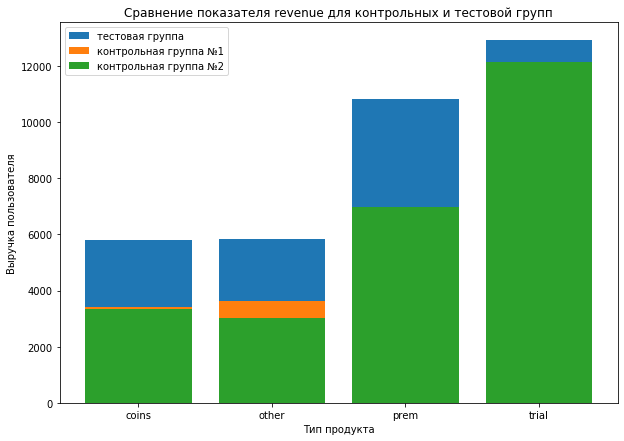

In [442]:

plt.bar(tg_rev.index, tg_rev.values, label='тестовая группа')
plt.bar(c1_rev.index, c1_rev.values, label='контрольная группа №1')
plt.bar(c2_rev.index, c2_rev.values, label='контрольная группа №2')
plt.xlabel('Тип продукта')
plt.ylabel('Выручка пользователя')
plt.title('Сравнение показателя revenue для контрольных и тестовой групп')
plt.legend()
plt.show()

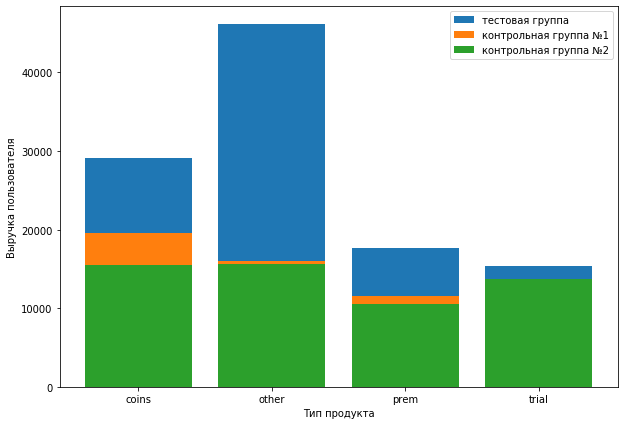

In [444]:
plt.bar(tg_totrev.index, tg_totrev.values, label='тестовая группа')
plt.bar(c1_totrev.index, c1_totrev.values, label='контрольная группа №1')
plt.bar(c2_totrev.index, c2_totrev.values, label='контрольная группа №2')
plt.xlabel('Тип продукта')
plt.ylabel('Суммарная выручка пользователя')
plt.legend()
plt.show()

##### Из приведенного выше анализа А/А/Б - теста пользователей, можно сделать твердый вывод, о том, что, действительно,
##### у пользователей, где стоимость премиум продписки была увеличена, их выручка была заметна выше